In [129]:
import pysam
import pandas as pd
import seaborn as sns
from matplotlib import style, colors
import matplotlib.pyplot as plt

### get reference sequence

this command give you the reference sequence

samtools faidx /projects/rcorbettprj2/GATK4VariantCall/GRCh37-lite.fa 1:10000-10020

In [115]:
# extract reads in a region and sort based on alignment position
#samtools view -h -q 10 /projects/analysis/analysis22/A37234/merge_bwa-mem-0.7.6a/125nt/hg19a/A37234_4_lanes_dupsFlagged.bam 5:1295228-1295229 | awk 'BEGIN{OFS="\t"}{if($1 ~ /^"@"/) {print} else {if($4 >= 1295220 || $4 <=1295230) {print} else {}}}'|sort -k4n|samtools view -Sbo /projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/test.bam -

In [94]:
# print(pysam.faidx.usage())

In [93]:
# paysam 0 indexed, bam in 1 indexed
ref = '/projects/rcorbettprj2/GATK4VariantCall/GRCh37-lite.fa'
pysam.faidx(ref, '1:10000-10003')

'>1:10000-10003\nNTAA\n'

In [96]:
'>1:10000-10003\nNTAA\n'.split('\n')[1]

'NTAA'

In [101]:
def get_ref_seqs(ref_file, region):
    """
    find sequence of reference genome in a region.
    
    Parameters
    ----------
    ref_file : str
        Path to genome FASTA file (idx file required).
    region: str
        format 'chr:start-end', example '1:10000-10003'.

    Returns
    -------
    sequence: str
        the bases of the reference genome.
    """
    return pysam.faidx(ref_file, region).split('\n')[1]

In [99]:
get_ref_seqs(ref, '1:10000-10003')

'NTAA'

In [134]:
bam = '/projects/analysis/analysis22/A37234/merge_bwa-mem-0.7.6a/125nt/hg19a/A37234_4_lanes_dupsFlagged.bam'
bam = '/projects/trans_scratch/validations/workspace/szong/Cervical/variant_bwamem/124_patients_new/test.bam'
samfile = pysam.AlignmentFile(bam, 'rb')
df = pd.DataFrame()
read_names = []
 
for pileupcolumn in samfile.pileup('5', 1295226, 1295230):
#     print(f'process position: {pileupcolumn.pos}, coverage is {pileupcolumn.n}')
    for pileupread in pileupcolumn.pileups:
        if not pileupread.is_del and not pileupread.is_refskip:
            read_name = pileupread.alignment.query_name
            align_pos = pileupcolumn.pos
            base = pileupread.alignment.query_sequence[pileupread.query_position]
#             print(f'read: {read_name}')
            read_names.append(read_name)
            df.loc[read_name, align_pos] = base
samfile.close()

In [135]:
df.shape

(55, 242)

In [138]:
df.head(2)

,1295104,1295105,1295106,1295107,1295108,1295109,1295110,1295111,1295112,1295113,...,1295336,1295337,1295338,1295339,1295340,1295341,1295342,1295343,1295344,1295345
HS18_44:1:2206:11904:30407,C,G,C,G,G,G,G,G,T,G,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS18_44:1:2109:14858:91647,read_end,read_end,read_end,G,G,G,G,G,T,G,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end


In [121]:
# read_names

In [149]:
mapdict = {'A':1, 'T':2, 'C':3, 'G':4, 'read_end':5}
for col in df.columns:
    df[col] = df[col].map(mapdict)

In [150]:
df = df.fillna('read_end').astype(int)
df.head(2)

,1295104,1295105,1295106,1295107,1295108,1295109,1295110,1295111,1295112,1295113,...,1295336,1295337,1295338,1295339,1295340,1295341,1295342,1295343,1295344,1295345
HS18_44:1:2206:11904:30407,3,4,3,4,4,4,4,4,2,4,...,5,5,5,5,5,5,5,5,5,5
HS18_44:1:2109:14858:91647,5,5,5,4,4,4,4,4,2,4,...,5,5,5,5,5,5,5,5,5,5


### sort reads based on alignment start postions

In [61]:
# df['length'] = (df == 0).sum(axis=1)
# df.sort_values('length', ascending=False, inplace=True)
# df.drop('length', axis=1, inplace=True)
# sorted((df == 0).sum(axis=1), reverse=True)

In [139]:
df.head(2)

,1295104,1295105,1295106,1295107,1295108,1295109,1295110,1295111,1295112,1295113,...,1295336,1295337,1295338,1295339,1295340,1295341,1295342,1295343,1295344,1295345
HS18_44:1:2206:11904:30407,C,G,C,G,G,G,G,G,T,G,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS18_44:1:2109:14858:91647,read_end,read_end,read_end,G,G,G,G,G,T,G,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end


In [140]:
color_dict = {'A':'green', 'T':'red', 'C':'blue', 'G':'orange', 'read_end':'black'}


In [141]:
def make_cmap_for_heatmap(categories, color_dict):
    '''map category types to a number and make a cmap for heatmap'''
    map_dict = {k:v for v, k in  enumerate(categories)} 
    clrs = [color_dict[m] for m in categories]
    cmap = colors.ListedColormap(clrs)
#     print('colors used:')
#     for cat, c in zip(categories, clrs):
#         print(cat, c)
#     sns.palplot(clrs)
    return (map_dict, cmap)

In [146]:
cats = ['A', 'T', 'C', 'G', 'read_end']
# cols = ['A', 'T', 'C', 'G']
# clrs = ['Greens', 'Reds', 'Blues', 'Greys']
_, clrmap = make_cmap_for_heatmap(cats, color_dict)

In [147]:
df.head()

,1295104,1295105,1295106,1295107,1295108,1295109,1295110,1295111,1295112,1295113,...,1295336,1295337,1295338,1295339,1295340,1295341,1295342,1295343,1295344,1295345
HS18_44:1:2206:11904:30407,C,G,C,G,G,G,G,G,T,G,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS18_44:1:2109:14858:91647,read_end,read_end,read_end,G,G,G,G,G,T,G,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS16_125:1:2215:9994:71631,read_end,read_end,read_end,G,G,G,G,G,T,G,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS18_44:1:2209:15088:65458,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS20_129:1:1203:13189:57684,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS16_125:1:2203:10657:67766,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS20_129:1:1112:14219:80037,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS20_129:1:2215:5583:57028,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS20_129:1:2110:13548:57054,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end
HS20_129:1:1105:13343:95747,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,...,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end,read_end


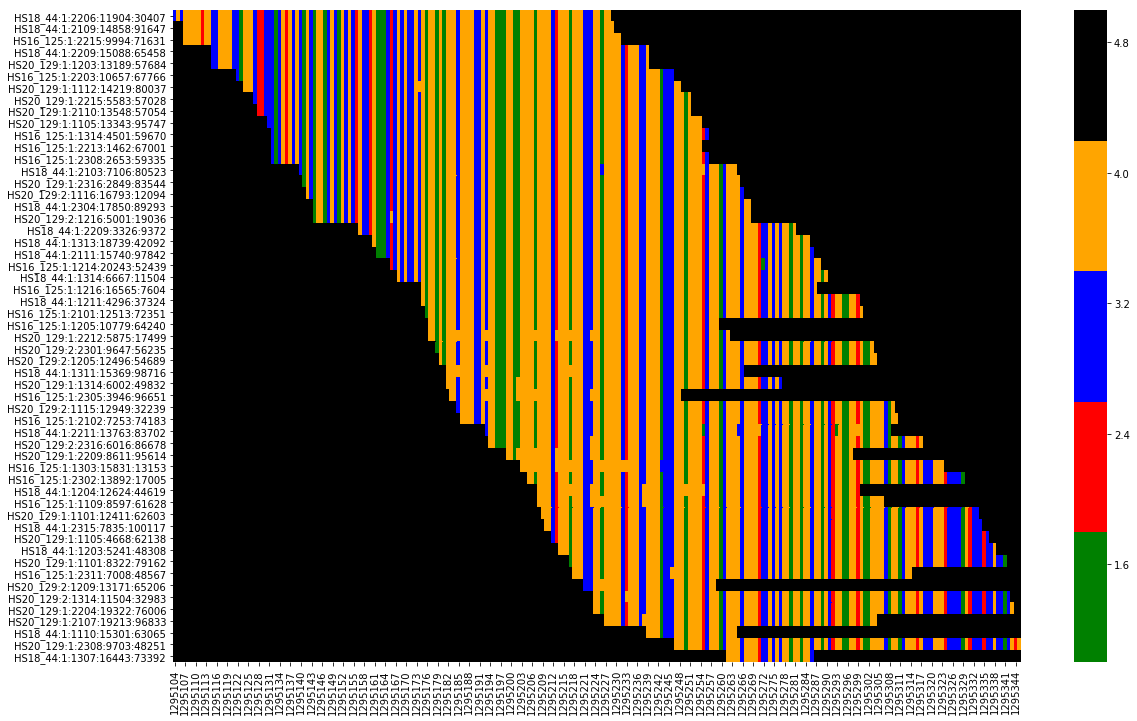

In [152]:
f, ax = plt.subplots(figsize=(19,12))
sns.heatmap(df, ax=ax, cmap=clrmap)

### construct the alignment map